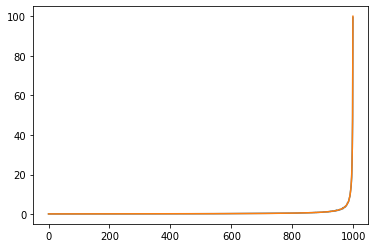

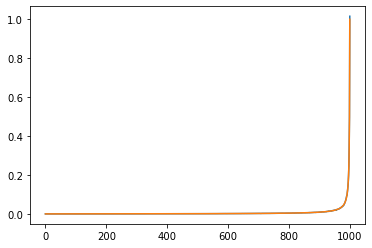

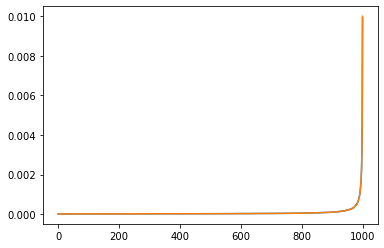

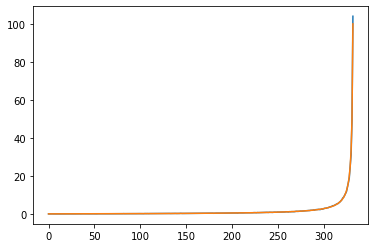

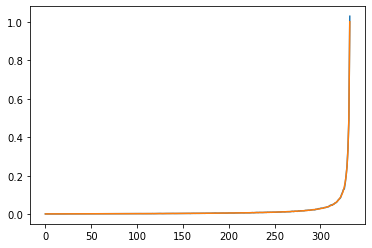

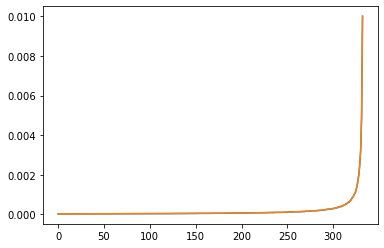

In [171]:
import numpy as np
import matplotlib.pyplot as plt

def make_experiment(alpha, windows):
    experiments = 1000
    mean = [0] * windows
    for _ in range(experiments):
        time = np.random.exponential(1/alpha, size=windows)
        time.sort()
        for i in range(windows):
            mean[i] += time[i]
    plt.plot([mean[0] / experiments] + [(mean[i] - mean[i - 1]) / experiments for i in range(1, windows)])
    plt.plot([1 / (alpha * (windows - i)) for i in range(windows)])
    plt.show()

make_experiment(0.01, 1000)
make_experiment(1, 1000)
make_experiment(100, 1000)

make_experiment(0.01, 333)
make_experiment(1, 333)
make_experiment(100, 333)

# Выводы
Выводы с практики про распределение X_(k) - X_(k - 1) подтвердились (на графиках синим изображено выборочное матожидание, а оранжевым теретическое, полученное на практике, видно, что они совпадают).
Также можно сделать вывод, что последнему человеку не позавидуешь (если число людей равно числу окошек и alpha в экспоненциальном распределениии маленькое)

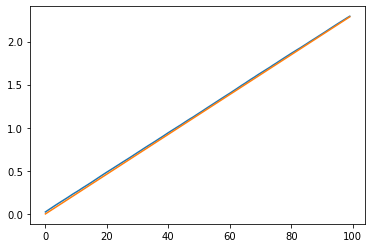

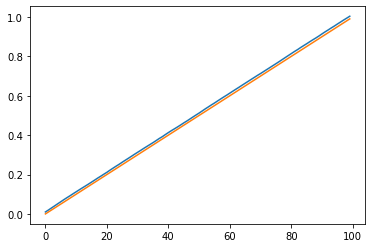

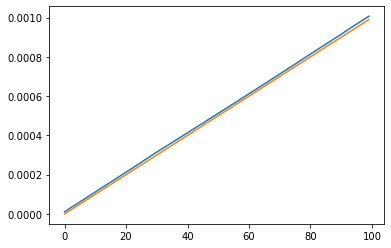

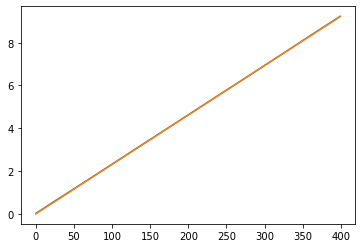

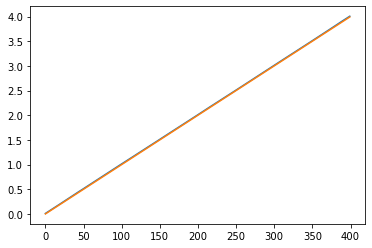

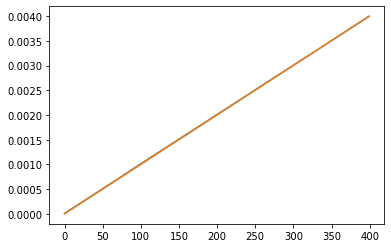

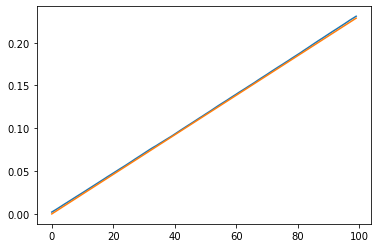

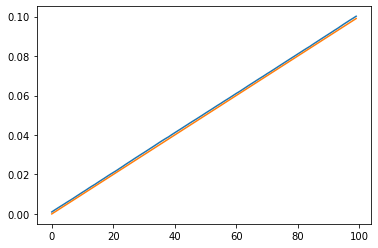

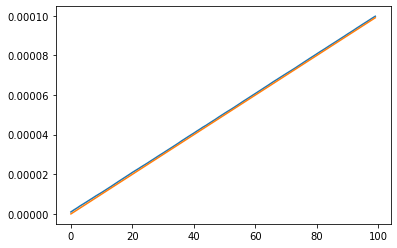

In [172]:
from queue import PriorityQueue

def make_experiment(alpha, windows, people):
    experiments = 1000
    mean = [0] * people
    for _ in range(experiments):
        queue = PriorityQueue()
        for x in np.random.exponential(1/alpha, size=windows):
            queue.put(x)
        for i in range(people):
            x = queue.get()
            mean[i] += x
            queue.put(x + np.random.exponential(1/alpha))
    plt.plot([x / experiments for x in mean])
    plt.plot([x / (alpha * windows) for x in range(people)])
    plt.show()

make_experiment(0.433, 100, 100)
make_experiment(1, 100, 100)
make_experiment(1000, 100, 100)

make_experiment(0.433, 100, 400)
make_experiment(1, 100, 400)
make_experiment(1000, 100, 400)

make_experiment(0.433, 1000, 100)
make_experiment(1, 1000, 100)
make_experiment(1000, 1000, 100)

# Выводы
Матожидание времени ожидания в очереди растет линейно, и равно 1/alpha для человека с номером, равным числу окошек. Это верно для любых alpha, числа окошек и размера очереди